In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
file_path = '/Users/kirtisailinaidu/Documents/Data Science project/marketing_campaign1 (1) (1).xlsx'
df = pd.read_excel(file_path)

In [3]:
print("First few rows of the dataset:")
display(df.head())

First few rows of the dataset:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
print("\nBasic information of the dataset:")
df.info()


Basic information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13

In [5]:
print("\nHandling missing values:")
df['Income'].fillna(df['Income'].mean(), inplace=True)


Handling missing values:


In [6]:
features = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 
               'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
               'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 
               'NumWebVisitsMonth']]

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

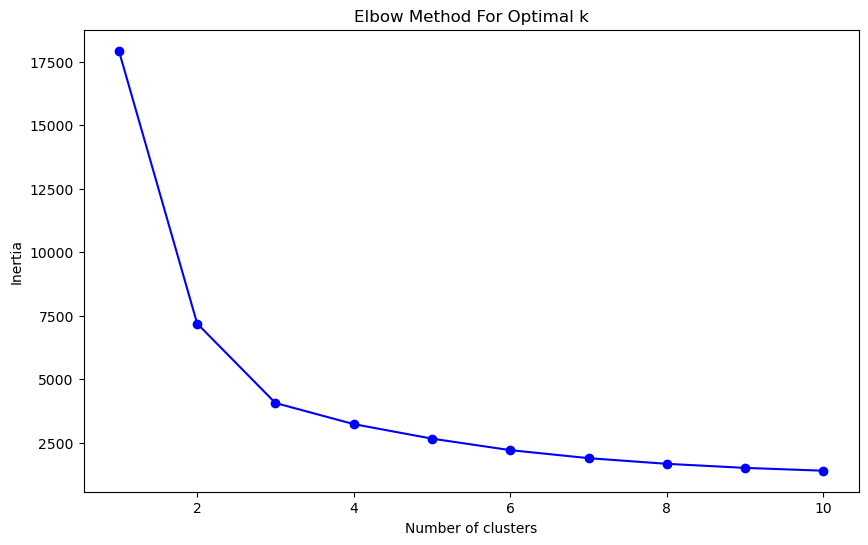

In [9]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(pca_features)

In [11]:
df['Cluster'] = clusters

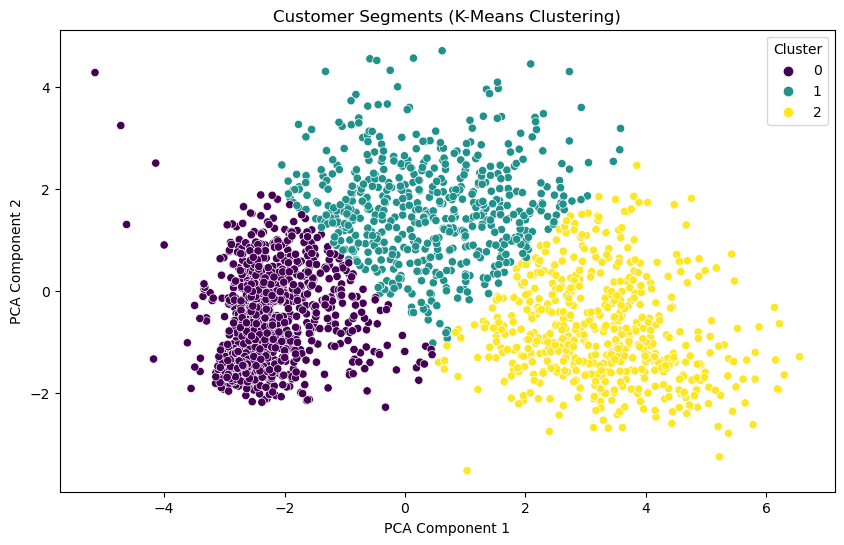

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [12]:
import pandas as pd

# Example data for df
data = {
    'Cluster': [1, 1, 2, 2, 3, 3],
    'A': [10, 15, 10, 15, 10, 15],
    'B': [20, 25, 20, 25, 20, 25],
    'C': [30, 35, 30, 35, 30, 35]
}
df = pd.DataFrame(data)

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Perform cluster analysis
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()

print("\nCluster Analysis:")
from IPython.display import display
display(cluster_analysis)


Cluster Analysis:


,Cluster,A,B,C
Cluster,,,,
1,1.0,12.5,22.5,32.5
2,2.0,12.5,22.5,32.5
3,3.0,12.5,22.5,32.5


In [14]:
silhouette_avg = silhouette_score(pca_features, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.51
